In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

pd.options.mode.chained_assignment = None

In [2]:
from Code import plot_ratings, plot_behavior, plot_gaze

## Set Paths and Parameters

In [14]:
# ToDo: Adapt wave and problematic subject list
wave = 2
if wave == 1:
    problematic_subjects = [1, 3, 12, 19, 33, 45, 46]
elif wave == 2:
    problematic_subjects = [1, 2, 3, 4, 20, 29, 64]

In [15]:
dir_path = os.getcwd()
dir_path = os.path.abspath(os.path.join(dir_path, os.pardir))
# ToDo: Adapt folder name
file_path = os.path.join(dir_path, f'Data-Wave{wave}')

In [16]:
SA_score="SPAI"

In [17]:
df_scores = pd.read_csv(os.path.join(file_path, 'scores_summary.csv'), decimal='.', sep=';')
df_ratings = pd.read_csv(os.path.join(file_path, 'ratings.csv'), decimal='.', sep=';')

## Behavior

In [39]:
df_events = pd.read_csv(os.path.join(file_path, 'events.csv'), decimal='.', sep=';')
df_distance = pd.read_csv(os.path.join(file_path, 'distance_vh.csv'), decimal='.', sep=';')
df_movement = pd.read_csv(os.path.join(file_path, 'movement.csv'), decimal='.', sep=';')
df_walk_dist = pd.read_csv(os.path.join(file_path, 'walking_distance.csv'), decimal='.', sep=';')

In [40]:
save_path = os.path.join(dir_path, f'Plots-Wave{wave}', 'Behavior')
if not os.path.exists(save_path):
    os.makedirs(save_path)

In [41]:
# if wave == 1:
#     plot_ratings.plot_rating_agents_sad_clicks(df_ratings, df_events, SA_score=SA_score)
#     plt.savefig(os.path.join(save_path, f"ratings_humans_clicks_{SA_score}.png"), dpi=300, bbox_inches="tight")

### Movement

SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
ANOVA: Walking Distance (Phase and SPAI)
SPAI Main Effect, F(1, 46.0)=0.3, p=0.588, p_eta_2=0.01
Phase Main Effect, F(1, 46.0)=0.57, p=0.452, p_eta_2=0.01
Interaction Phase x SPAI, F(1, 46.0)=0.97, p=0.329, p_eta_2=0.02
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
ANOVA: Average Distance To Start (Phase and SPAI)
SPAI Main Effect, F(1, 46.0)=2.6, p=0.113, p_eta_2=0.03
Phase Main Effect, F(1, 46.0)=0.37, p=0.546, p_eta_2=0.0
Interaction Phase x SPAI, F(1, 46.0)=0.0, p=0.979, p_eta_2=0.0
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
ANOVA: Maximum Distance To Start (Phase and SPAI)
SPAI Main Effect, F(1, 46.0)=1.32, p=0.256, p_eta_2=0.02
Pha

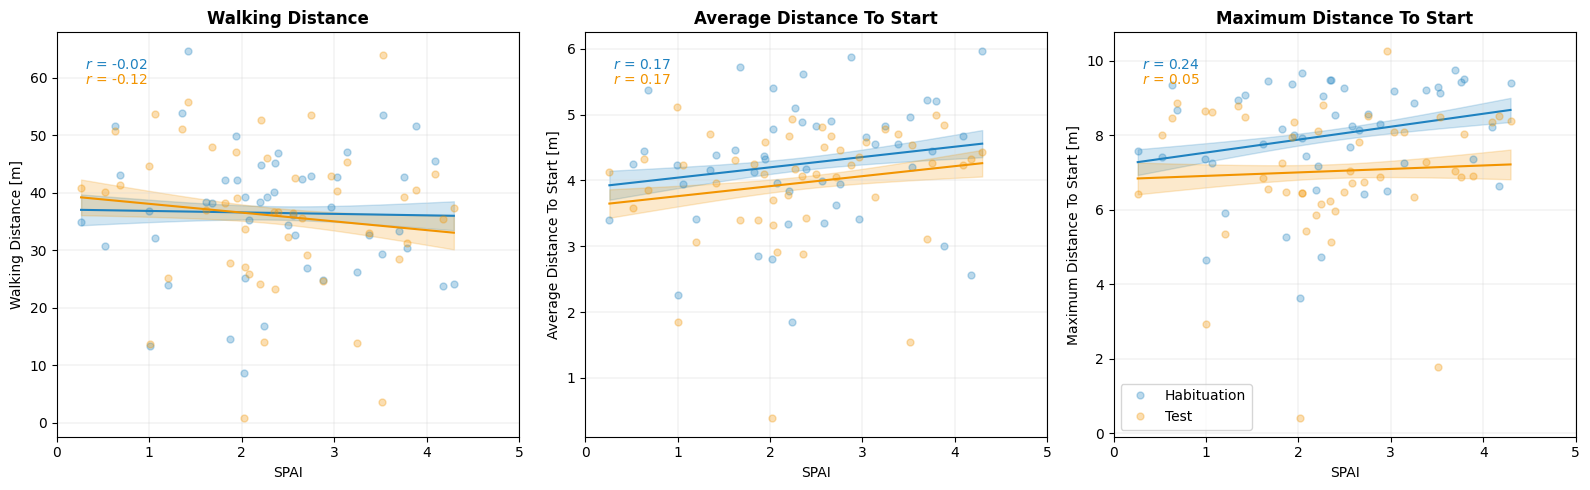

In [42]:
plot_behavior.plot_walking_distance(df_walk_dist, SA_score)
plt.savefig(os.path.join(save_path, f"walking_distance_grouped_{SA_score}.png"), dpi=300)

In [43]:
if wave == 1:
    # plot_behavior.plot_movement_single_plots(df_movement, wave, SA_score)
    for cutoff in ["cutoff", "median"]:
        plot_behavior.plot_movement_sad(df_movement, file_path, SA_score, cutoff)
        plt.savefig(os.path.join(save_path, f"movement_{cutoff}_{SA_score}.png"), dpi=300, bbox_inches='tight')
        
# if wave == 2:
#     plot_behavior.animate_movement(df_movement, 56, SA_score, save_path)

### Interpersonal Distance

boundary (singular) fit: see help('isSingular') 
boundary (singular) fit: see help('isSingular') 

boundary (singular) fit: see help('isSingular') 

SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
ANOVA: Average Interpersonal Distance (Condition and SPAI)
Condition Main Effect, F(1, 92.0)=1.19, p=0.278, p_eta_2=0.01
SPAI Main Effect, F(1, 92.0)=0.77, p=0.383, p_eta_2=0.01
Interaction Condition x SPAI, F(1, 92.0)=0.12, p=0.734, p_eta_2=0.0


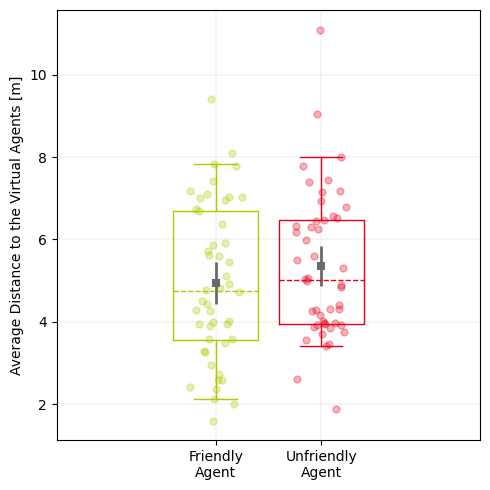

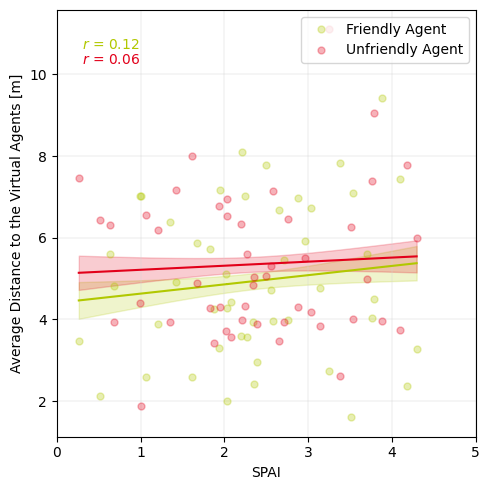

In [44]:
dist = "avg"
if wave == 1:
    plot_behavior.plot_interpersonal_distance_diff(df_distance, save_path, dist, SA_score)
    plt.savefig(os.path.join(save_path, f"distance_{dist}_hab-test.png"), dpi=300, bbox_inches="tight")

    plot_behavior.plot_interpersonal_distance_diff_sad(df_distance, dist, SA_score)
    plt.savefig(os.path.join(save_path, f"distance_{dist}_diff_{SA_score}.png"), dpi=300)
if wave == 2:
    plot_behavior.plot_interpersonal_distance(df_distance, save_path, wave, dist, SA_score, only_visible=True)
    plt.savefig(os.path.join(save_path, f"distance_{dist}_test.png"), dpi=300)

    plot_behavior.plot_interpersonal_distance_sad(df_distance, wave, dist, SA_score, only_visible=True)
    plt.savefig(os.path.join(save_path, f"distance_{dist}_test_{SA_score}.png"), dpi=300)

SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
ANOVA: Minimum Interpersonal Distance (Condition and SPAI)
Condition Main Effect, F(1, 46.0)=5.66, p=0.022, p_eta_2=0.06
SPAI Main Effect, F(1, 46.0)=3.16, p=0.082, p_eta_2=0.04
Interaction Condition x SPAI, F(1, 46.0)=0.0, p=0.955, p_eta_2=0.0


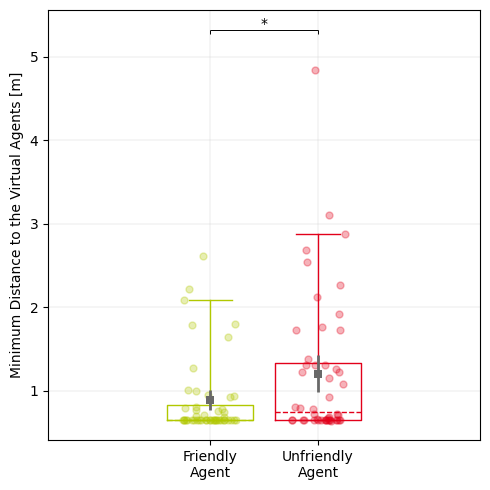

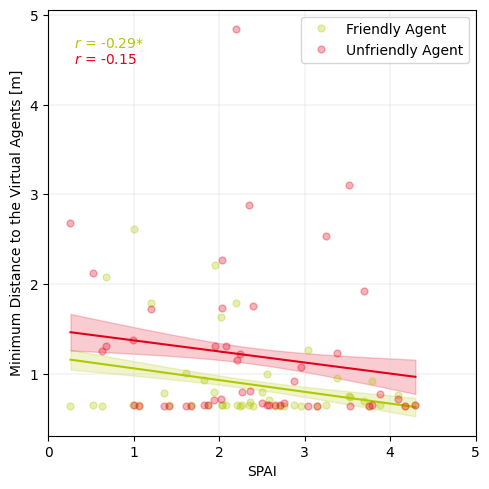

In [45]:
dist = "min"
if wave == 1:
    plot_behavior.plot_interpersonal_distance_diff(df_distance, save_path, dist, SA_score)
    plt.savefig(os.path.join(save_path, f"distance_{dist}_hab-test.png"), dpi=300, bbox_inches="tight")

    plot_behavior.plot_interpersonal_distance_diff_sad(df_distance, dist, SA_score)
    plt.savefig(os.path.join(save_path, f"distance_{dist}_diff_{SA_score}.png"), dpi=300)
if wave == 2:
    plot_behavior.plot_interpersonal_distance(df_distance, save_path, wave, dist, SA_score, only_visible=True)
    plt.savefig(os.path.join(save_path, f"distance_{dist}_test.png"), dpi=300)

    plot_behavior.plot_interpersonal_distance_sad(df_distance, wave, dist, SA_score, only_visible=True)
    plt.savefig(os.path.join(save_path, f"distance_{dist}_test_{SA_score}.png"), dpi=300)

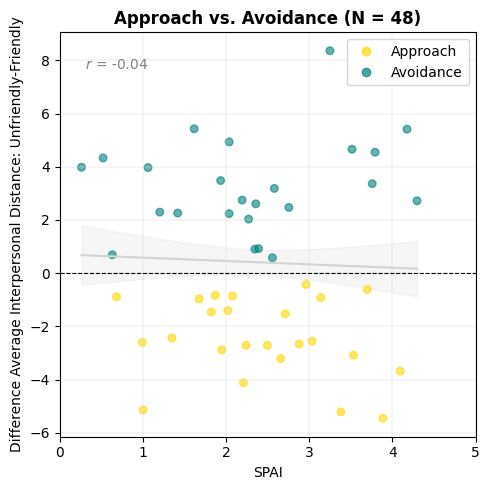

In [46]:
df_diff_dis = plot_behavior.plot_diff_distance(df_distance, wave, SA_score)
plt.savefig(os.path.join(save_path, f"distance_test-diff_{SA_score}.png"), dpi=300)

### Duration

boundary (singular) fit: see help('isSingular') 
boundary (singular) fit: see help('isSingular') 

boundary (singular) fit: see help('isSingular') 

SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
ANOVA: Duration in Rooms (Condition and SPAI)
Condition Main Effect, F(1, 90.0)=0.04, p=0.851, p_eta_2=0.0
SPAI Main Effect, F(1, 90.0)=0.26, p=0.608, p_eta_2=0.0
Interaction Condition x SPAI, F(1, 90.0)=0.8, p=0.374, p_eta_2=0.01
boundary (singular) fit: see help('isSingular') 
boundary (singular) fit: see help('isSingular') 

boundary (singular) fit: see help('isSingular') 

SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
ANOVA: Look at Agents (Condition and SPAI)
Condition Main Effect, F(1, 91.0)=3.17, p=0.078, p_eta_2=0.03
SPAI Main Effect, F(1, 91.0)=0.33, p=0.568, p_eta_2=0.0
Interaction Co

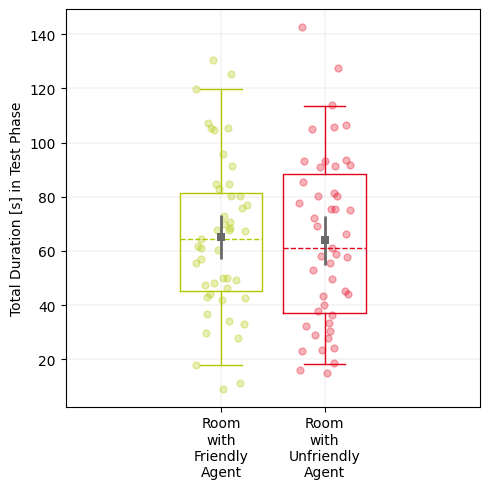

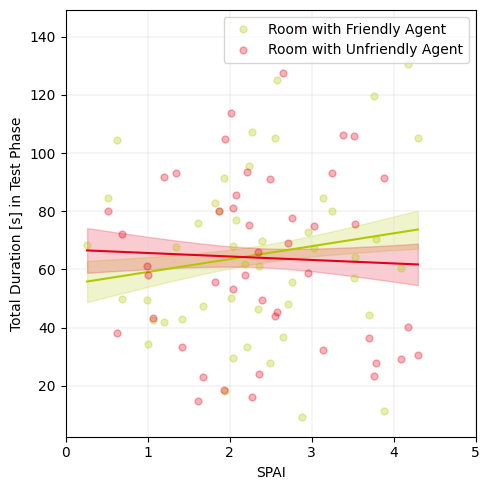

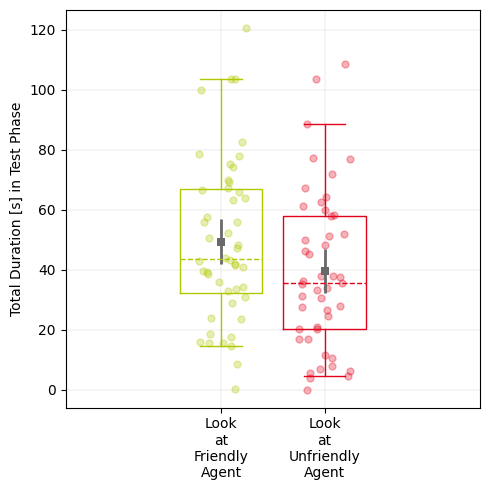

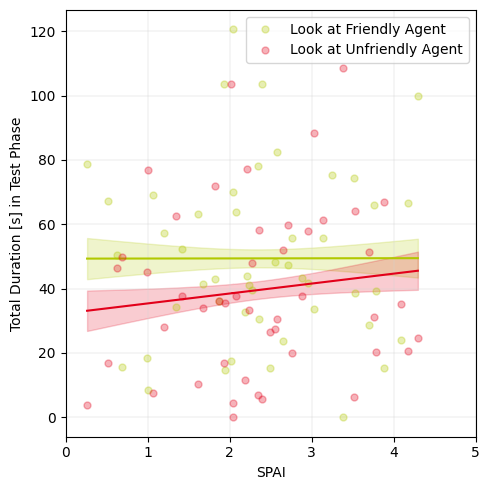

In [47]:
if wave == 1:
    # plot_behavior.plot_time_rooms(df_events, SA_score)
    # plt.savefig(os.path.join(save_path, f"duration_rooms.png"), dpi=300, bbox_inches="tight")
    
    plot_behavior.plot_time_rooms_agents_static_diff(df_events, save_path, SA_score)
    plt.savefig(os.path.join(save_path, f"duration_hab-test.png"), dpi=300, bbox_inches="tight")

    plot_behavior.plot_time_rooms_agents_static_diff_sad(df_events, SA_score)
    plt.savefig(os.path.join(save_path, f"duration_diff_{SA_score}.png"), dpi=300)

if wave == 2:
    plot_behavior.plot_time_rooms_agents_dynamic(df_events, save_path, SA_score)
    plt.savefig(os.path.join(save_path, f"duration_room_test.png"), dpi=300)

    plot_behavior.plot_time_test_rooms_agents_dynamic_sad(df_events, SA_score)
    plt.savefig(os.path.join(save_path, f"duration_room_test_{SA_score}.png"), dpi=300)
    
    plot_behavior.plot_time_test_look_agents_dynamic(df_events, save_path, SA_score)
    plt.savefig(os.path.join(save_path, f"duration_look_test.png"), dpi=300)
    
    plot_behavior.plot_time_test_look_agents_dynamic_sad(df_events, SA_score)
    plt.savefig(os.path.join(save_path, f"duration_look_test_{SA_score}.png"), dpi=300)

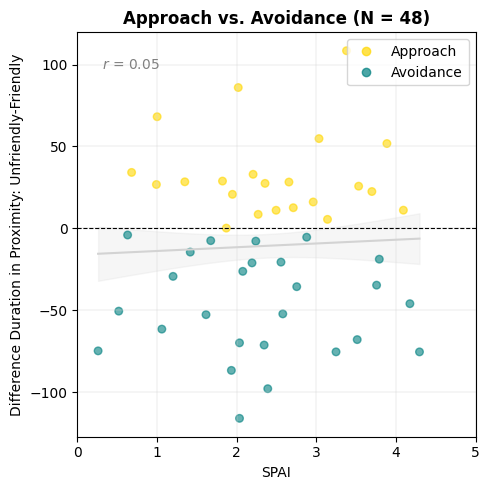

In [48]:
df_diff_dur = plot_behavior.plot_diff_duration(df_events, wave, SA_score)
plt.savefig(os.path.join(save_path, f"duration_test-diff_{SA_score}.png"), dpi=300)

### Clicks

In [49]:
if wave == 1:
    plot_behavior.plot_clicks(df_events, save_path, SA_score)
    plt.savefig(os.path.join(save_path, f"clicks_test.png"), dpi=300)

    plot_behavior.plot_clicks_sad(df_events, SA_score)
    plt.savefig(os.path.join(save_path, f"clicks_test_{SA_score}.png"), dpi=300)

## Gaze

In [18]:
df_gaze = pd.read_csv(os.path.join(file_path, 'gaze.csv'), decimal='.', sep=';')

In [19]:
save_path = os.path.join(dir_path, f'Plots-Wave{wave}',  'Gaze')
if not os.path.exists(save_path):
    os.makedirs(save_path)

In [23]:
dvs = ["Gaze Proportion", "Switches"]
dv = dvs[0]

### Test Phase

SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
P-values adjusted by holm method for 1 comparisons
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
ANOVA: Gaze Test (Condition, ROI and SPAI)
Condition Main Effect, F(1, 138.0)=1.28, p=0.259, p_eta_2=0.01
SPAI Main Effect, F(1, 46.0)=0.05, p=0.827, p_eta_2=0.0
ROI Main Effect, F(1, 138.0)=1.13, p=0.29, p_eta_2=0.01
Interaction Condition x SPAI, F(1, 138.0)=1.55, p=0.216, p_eta_2=0.01
Interaction Condition x ROI, F(1, 138.0)=0.08, p=0.781, p_eta_2=0.0
Interaction SPAI x ROI, F(1, 138.0)=0.03, p=0.856, p_eta_2=0.0
Interaction Condition x SPAI x ROI, F(1, 138.0)=0.01, p=0.938, p_eta_2=0.0
P-values adjusted by holm method for 1 comparisons


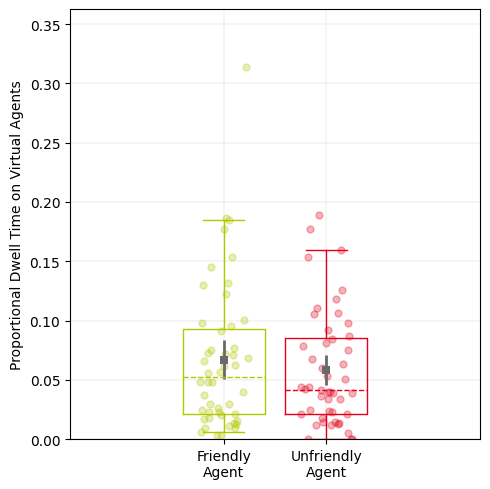

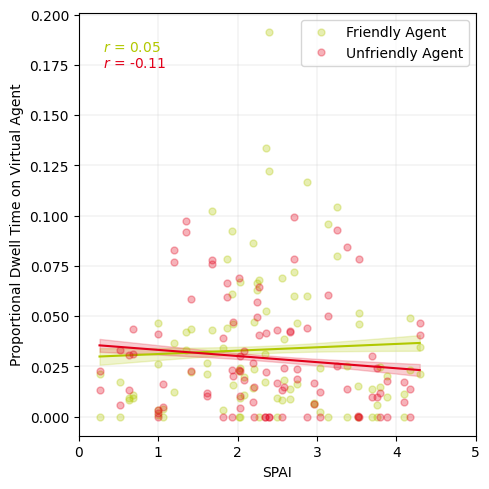

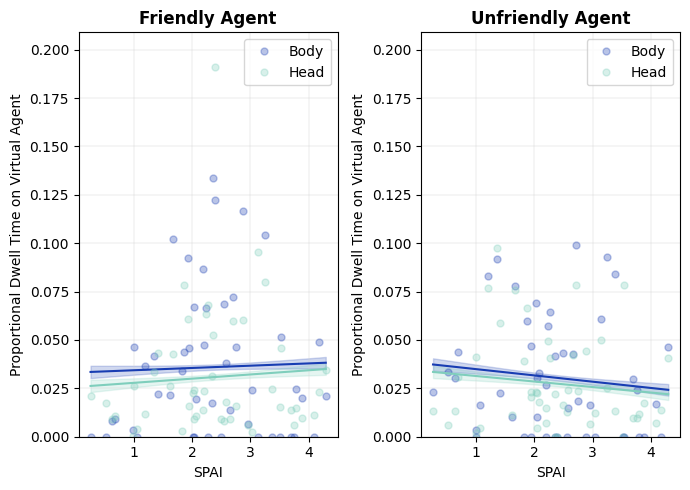

In [24]:
plot_gaze.plot_gaze_test(df_gaze, save_path, wave, dv=dv, SA_score=SA_score)
plt.savefig(os.path.join(save_path, f"gaze_test-{dv}.png"), dpi=300)

plot_gaze.plot_gaze_test_sad(df_gaze, dv=dv, SA_score=SA_score)
plt.savefig(os.path.join(save_path, f"gaze_test-{dv}_{SA_score}.png"), dpi=300)

plot_gaze.plot_gaze_test_roi(df_gaze, save_path, dv=dv, SA_score=SA_score)
plt.savefig(os.path.join(save_path, f"gaze_test_roi-{dv}_{SA_score}.png"), dpi=300)

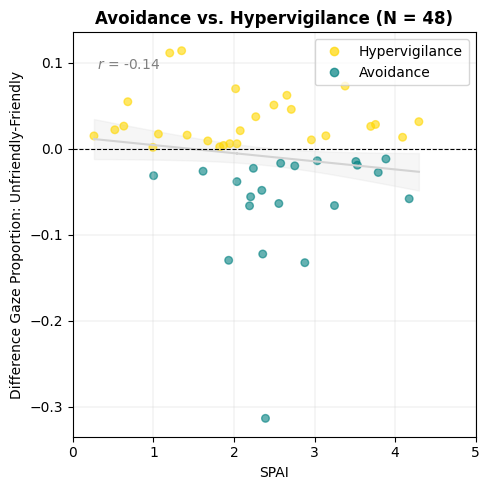

In [25]:
df_diff_gaze = plot_gaze.plot_diff_gaze(df_gaze, SA_score=SA_score)
plt.savefig(os.path.join(save_path, f"gaze_test-{dv}-diff_{SA_score}.png"), dpi=300)

In [55]:
df_diff = df_diff_gaze.merge(df_diff_dur, on="VP")
df_diff = df_diff.merge(df_diff_dis, on="VP")

x = df_diff["dis_diff"].to_numpy()
y = df_diff["dur_diff"].to_numpy()
linreg = linregress(x, y)
print(f"Interpersonal Difference x Time: r = {round(linreg.rvalue, 2)}, p = {round(linreg.pvalue, 3)}")

x = df_diff["dis_diff"].to_numpy()
y = df_diff["gaze_diff"].to_numpy()
linreg = linregress(x, y)
print(f"Interpersonal Difference x Gaze: r = {round(linreg.rvalue, 2)}, p = {round(linreg.pvalue, 3)}")

x = df_diff["dur_diff"].to_numpy()
y = df_diff["gaze_diff"].to_numpy()
linreg = linregress(x, y)
print(f"Gaze x Time: r = {round(linreg.rvalue, 2)}, p = {round(linreg.pvalue, 3)}")

Interpersonal Difference x Time: r = -0.79, p = 0.0
Interpersonal Difference x Gaze: r = -0.2, p = 0.182
Gaze x Time: r = 0.39, p = 0.007
